In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
%matplotlib inline

# Dataset

### Colunas

- **date**: A data em que a casa foi vendida.

- **price**: O preço de venda da casa. (Variável que queremos prever)

- **bedrooms**: O número de quartos na casa.

- **bathrooms**: O número de banheiros na casa.

- **sqft_living**: A área interna da casa em metros quadrados.

- **sqft_lot**: O tamanho do lote em metros quadrados.

- **floors**: O número de andares na casa.

- **waterfront**: Uma variável binária indicando se a casa tem vista para a água ou não.

- **view**: Um índice de 0 a 4 que representa o quão boa é a vista da casa.

- **condition**: Um índice de 1 a 5 que representa a condição geral da casa.

- **sqft_above**: A área interna da casa acima do nível do solo em metros quadrados.

- **sqft_basement**: A área interna da casa abaixo do nível do solo em metros quadrados.

- **yr_built**: O ano em que a casa foi construída.

- **yr_renovated**: O ano em que a casa foi renovada pela última vez.

- **street**: O nome da rua em que a casa está localizada.

- **city**: A cidade em que a casa está localizada.

- **statezip**: O estado e o código postal em que a casa está localizada.

- **country**: O país em que a casa está localizada.

In [2]:
#Carregando dataset
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.shape

(4600, 18)

In [4]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Com base no que vimos, podemos excluir algumas colunas que serão pouco significativas para o modelo:

'date' : Por não interferir no preço do imóvel.

'street' : Por assumir muitos valores diferentes, prejudicando a eficiência do modelo.

'country' : Por assumir apenas um valor, sendo irrelevante para a previsão do preço.

'waterfront' : Por assumir apenas dois valores diferentes, o que torna pouco relevante também.

In [8]:
df = df.drop(['date','street','country', 'waterfront'], axis=1)

# Escolhendo as features

<AxesSubplot: >

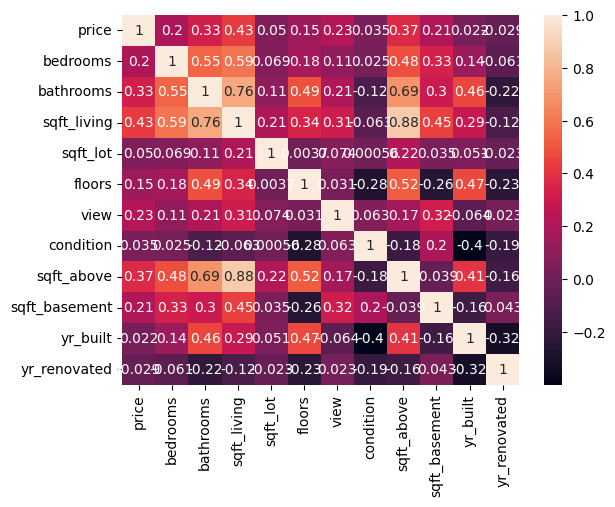

In [9]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

Através do mapa de calor das correlações, podemos remover mais duas colunas que possuem uma correlação baixa com o preço:

'sqft_lot','yr_renovated' e 'yr_built'

In [10]:
df.drop('yr_renovated', axis = 1, inplace = True)
df.drop('yr_built', axis = 1, inplace = True)
df.drop('sqft_lot', axis = 1, inplace = True)

## Dataset após as mudanças

In [11]:
df.iloc[:, :12]

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,sqft_above,sqft_basement,city,statezip
0,3.130000e+05,3.0,1.50,1340,1.5,0,3,1340,0,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,2.0,4,5,3370,280,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,1.0,0,4,1930,0,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,1.0,0,4,1000,1000,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,1.0,0,4,1140,800,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,1.0,0,4,1510,0,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,2.0,0,3,1460,0,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,2.0,0,3,3010,0,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,1.0,0,3,1070,1020,Seattle,WA 98178


## Distribuições das variáveis independentes contínuas

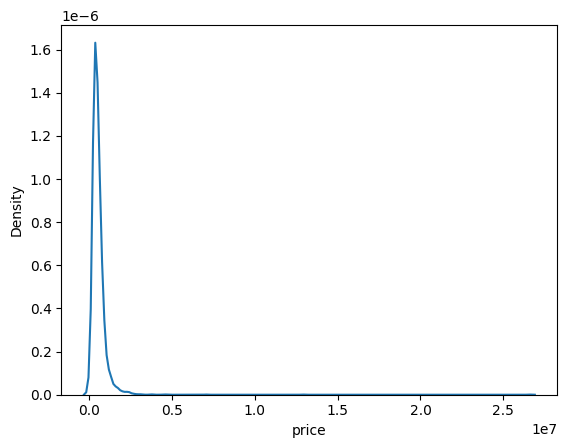

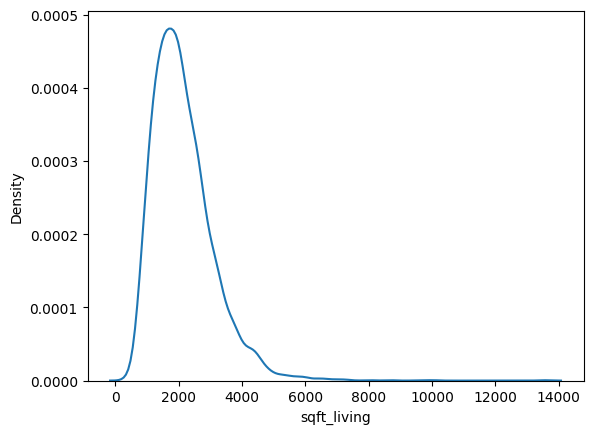

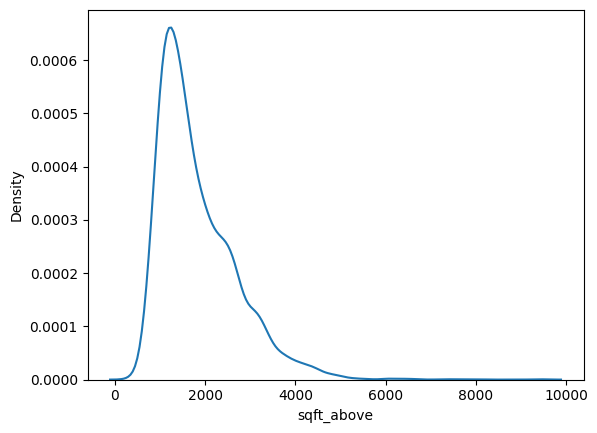

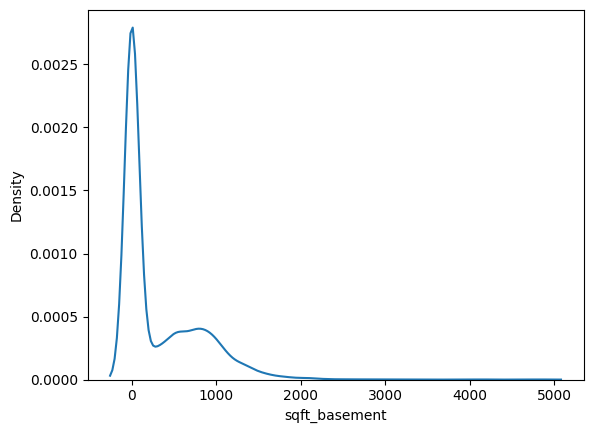

In [12]:
for i in ["price" , "sqft_living", "sqft_above","sqft_basement"]:
    sns.kdeplot(df[i])
    plt.show()

Fazendo depois um histograma, percebi que tinham algumas casas sem preço (que iriam prejudicar a previsão). 

In [13]:
#Removendo casas sem preço
df = df[df['price'] != 0]

Com base na análise das distribuições e em testes que fiz, filtrei as colunas contínuas removendo os valores discrepantes
(outliers).

In [14]:
#Removendo outliers 
df = df[(df['price'] <= 2300000) & (df['price'] > 7800)]
df = df[df['sqft_living'] <= 7000]
df = df[df['sqft_above'] <= 7000]

## Distribuições após a remoção de outliers

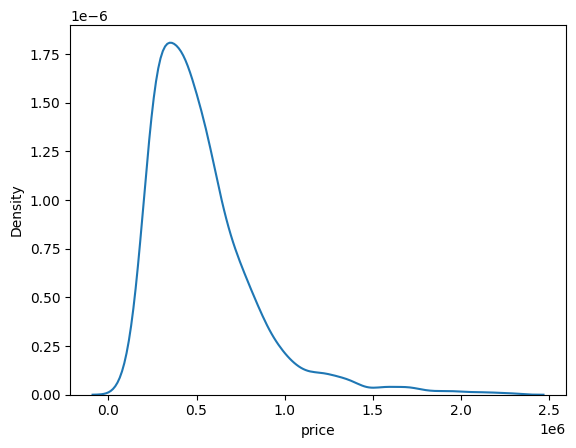

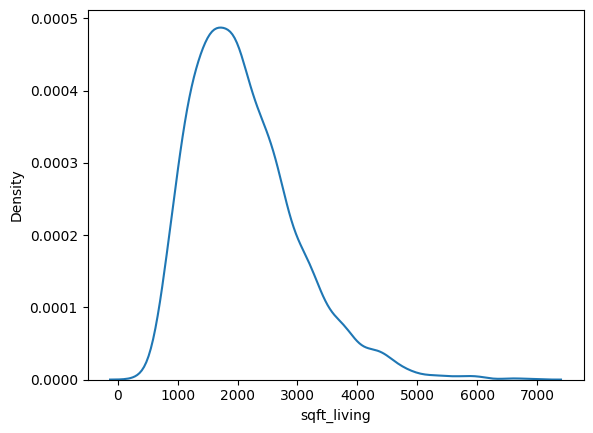

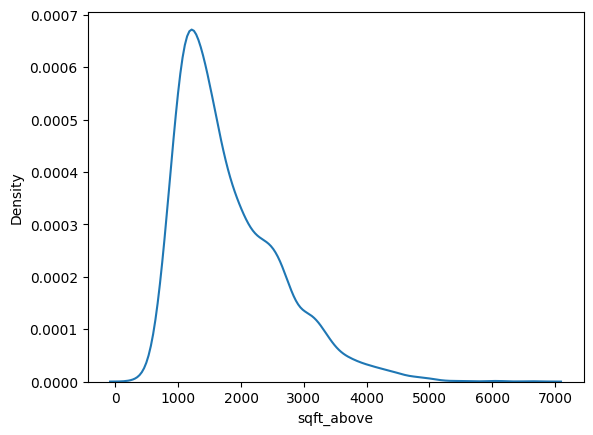

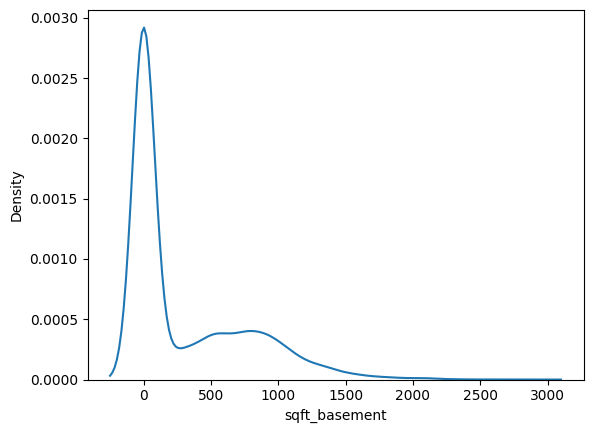

In [15]:
for i in ["price" , "sqft_living", "sqft_above","sqft_basement"]:
    sns.kdeplot(df[i])
    plt.show()

## Fazendo o mesmo para as variáveis com pouca variação ("discretas")

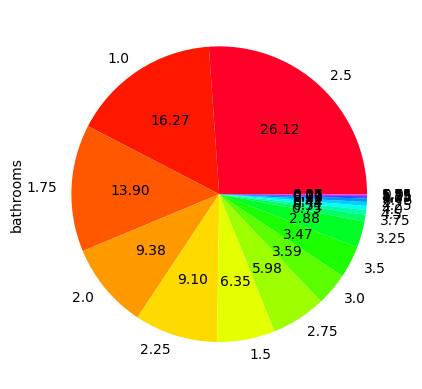

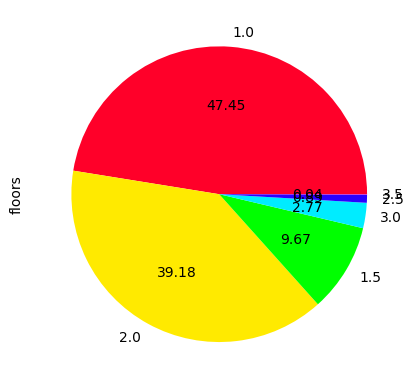

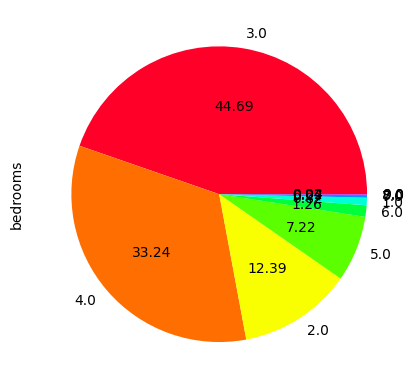

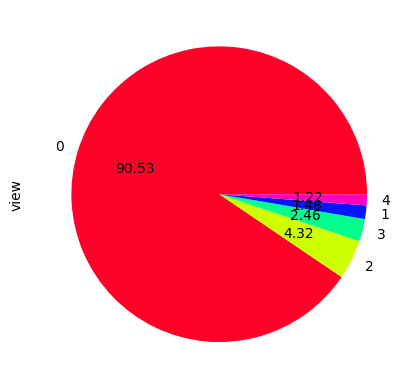

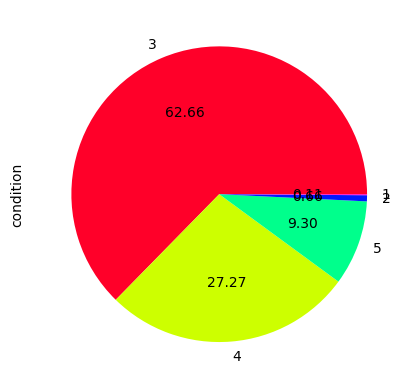

In [16]:
for k in ["bathrooms", 'floors','bedrooms', 'view', 'condition']:
    df[k].value_counts().plot(kind='pie', autopct = "%.2f", cmap = 'gist_rainbow')
    plt.show()

In [17]:
df = df[(df['bedrooms'] <= 6) | (df['bedrooms'] <= 1)]
df = df[df['condition'] >= 2]
df = df[df['bathrooms'] <= 4]
df = df[(df['floors'] !=3.5) | (df['floors'] != 2.5)]

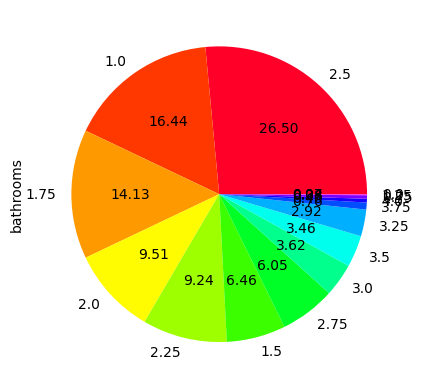

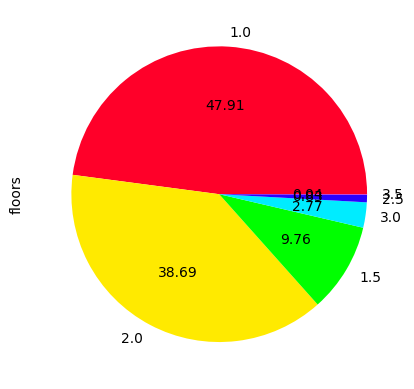

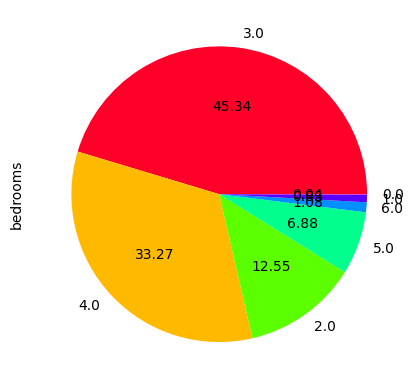

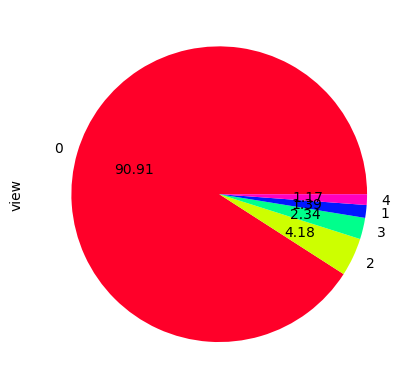

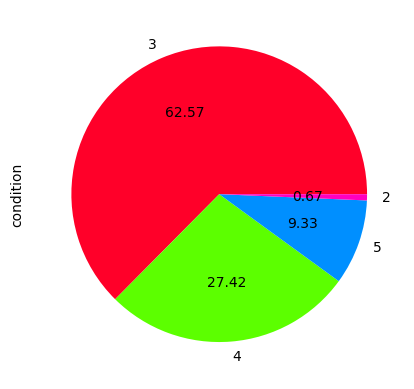

In [18]:
for k in ["bathrooms", 'floors','bedrooms', 'view', 'condition']:
    df[k].value_counts().plot(kind='pie', autopct = "%.2f", cmap = 'gist_rainbow')
    plt.show()

## Dataset a remoção dos outliers

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,sqft_above,sqft_basement,city,statezip
0,313000.0,3.0,1.50,1340,1.5,0,3,1340,0,Shoreline,WA 98133
2,342000.0,3.0,2.00,1930,1.0,0,4,1930,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,1.0,0,4,1000,1000,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,1.0,0,4,1140,800,Redmond,WA 98052
5,490000.0,2.0,1.00,880,1.0,0,3,880,0,Seattle,WA 98115


In [20]:
df.shape

(4446, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4446 non-null   float64
 1   bedrooms       4446 non-null   float64
 2   bathrooms      4446 non-null   float64
 3   sqft_living    4446 non-null   int64  
 4   floors         4446 non-null   float64
 5   view           4446 non-null   int64  
 6   condition      4446 non-null   int64  
 7   sqft_above     4446 non-null   int64  
 8   sqft_basement  4446 non-null   int64  
 9   city           4446 non-null   object 
 10  statezip       4446 non-null   object 
dtypes: float64(4), int64(5), object(2)
memory usage: 416.8+ KB


Após essa filtragem, é hora de criar as variáveis (uma contendo as features e outra a variável target).

In [22]:
X = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].values
y = df.iloc[:, 0].values

In [23]:
print(X.shape)
print(y.shape)

(4446, 10)
(4446,)


## Dividindo em treino e teste

Agora iremos aplicar a função 'train_test_split' para dividir os dados em treino e teste. Os dados de treino serão usados para o modelo capturar os padrões entre variáveis independentes (features) e a variável dependente (target). Já os dados de treino são usados para expor o modelo à novos dados e medir sua eficácia (capacidade generalização).

In [24]:
from sklearn.model_selection import train_test_split

rst = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rst)

print(rst)

11


In [25]:
X_train[:, [4,5,6]]

array([[0, 3, 860],
       [0, 3, 2260],
       [0, 4, 1640],
       ...,
       [0, 4, 2390],
       [0, 3, 2105],
       [0, 5, 1670]], dtype=object)

### Dummies e feature scaling

Para evitar uma mistura entre os dados de treino e teste, que poderia gerar erros no modelo (dataleakage), aplicaremos as técnicas de pré-processamento depois da divisão dos dados. 

Com base na análise gráfica e fazendo várias testes, decidi aplicar as seguintes transformações:

**'OneHotEncoder'** : Transforma as variáveis categóricas em variáveis numéricas atravésda criação de várias colunas binárias. Quando um registro (linha) pertence a uma dessas variáveis, ela irá assumir valor 1 na coluna daquela variável.

- Aplicada nas colunas 'city' e 'statezip'.

**'StandardScaler'** : Aplica a técnica de padronização, que transforma as variáveis em conjuntos de média 0 e desvio-padrão 1 (como em uma distribuição normal).

- Aplicada nas colunas 'floor', 'view', 'condition'

**'FunctionTransformer'** : Aplica a transformação logarítmica, suavizando o efeito da variância em distribuições assimétricas positivas (com muitos valores baixos e poucos altos).

- Aplicada nas colunas 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'

In [26]:
# Definir as colunas que serão codificadas com OneHotEncoder e as que serão escalonadas com MinMaxScaler
cat_cols = [8, 9]
num_cols = [3, 4, 5]
log_cols = [2, 6, 7]

# pipeline para as colunas numéricas
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

# pipeline para as colunas categóricas
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# combinando as duas pipelines usando o ColumnTransformer
ct = ColumnTransformer([
    ('numeric', numeric_pipeline, num_cols),
    ('categorical', cat_pipeline, cat_cols)
], remainder = 'passthrough')

# Aplicar o pré-processamento nos dados de treinamento e teste
X_train_preprocessed = ct.fit_transform(X_train)
X_test_preprocessed = ct.transform(X_test)



Após o pré-processamento, podemos aplicar treinar e testar o modelos. 

Nesse projeto, testei alguns modelos de regressão, obtendo melhor desempenho com Regressão Linear e Random Forest.

# Regressão Linear

In [27]:
#Instanciando objeto
reg = LinearRegression()

#Treinando o modelo
reg.fit(X_train_preprocessed, y_train)

#Prevendo resultados
y_pred = reg.predict(X_test_preprocessed)

### Cross validation e evaluation

Agora com o modelo treinado e testado, vamos verificar se não houve erros no treinamento (overfitting) através do cross validation e avaliaremos os resultados do modelo utilizando algumas métricas de avaliação.

Com a função 'cross_val_score', apliquei o cross validation dividindo o modelo em 5 partes ('cv=5'). Desse modo, o modelo será testado em cada combinação diferente em treino e teste. 

Exemplo: 5 Partes : A, B, C, D e E.

(A - Teste) e (B, C, D e E - Treino)

(B - Teste) e (A, C, D e E - Treino)

E assim por diante...

In [28]:
#Executando cross validation
cross_value = cross_val_score(reg, X_train_preprocessed, y_train, cv=5) 

## Métricas de avaliação:

- **'r2_score'**: Valor em porcentagem que representa o quão bem o modelo descreve (explica) a varição dos dados.

- **'mae'**: Erro médio absoluto. Valor médio da diferença entre os valores previstos e os valores reais.

- **'rmse'**: Raiz do erro quadrático médio. Similar ao Erro médio absoluto, mas com um peso maior para erros maiores.

- **'cross_value.mean'**: Média dos valores (r2_scores) gerados pelo cross validation.

In [29]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print('R2:', round(r2*100, 2), '%')
print('MAE:', mae)
print('RMSE:', rmse)
print('Cross_value_mean:', round(cross_value.mean()*100, 2), '%')
print('Cross_values:', cross_value)

R2: 73.28 %
MAE: 85761.6152604678
RMSE: 148220.80488893492
Cross_value_mean: 75.33 %
Cross_values: [0.73180071 0.81047213 0.75607478 0.66286548 0.80548122]


Analisando os valores das métricas, tivemos um **valor razoavelmente bom de r2 (73.28% e 75.33% na média do cross validation)**, um **valor de 88,998 de Erro médio absoluto (bom, considerando que os preços variam muito)** e um **valor de RMSE um pouco mais elevado (devido a imprecisões em valores maiores de erro).**

## Visualizando valores preditos e valores reais

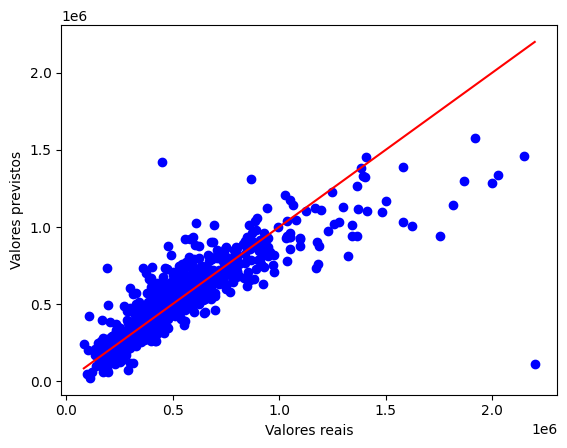

In [30]:
# plotar valores reais vs valores previstos
plt.scatter(y_test, y_pred, color='blue')

# adicionar linha diagonal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c ='r')

# definir rótulos dos eixos
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')

# mostrar gráfico
plt.show()

Aqui podemos notar que o modelo prevê bem os preços menores, mas tem dificuldade em acertar os imóveis com preços mais elevados (inclusive prevendo valores muito altos para algumas casas baratas). Isso pode ser fruto de alguns padrões específicos não capturados pelo modelo, como: bairro, rua ou alguma informação não contida no dataset.

## Distribuição de resíduos

Resíduos são os erros (diferenças entre valores preditos e valores reais) do modelo. Para um modelo ser considerado bom, é necessário que a distribuição de resíduos gire em torno de zero, pois dessa forma vemos que o modelo tem erros baixos em suas previsões.

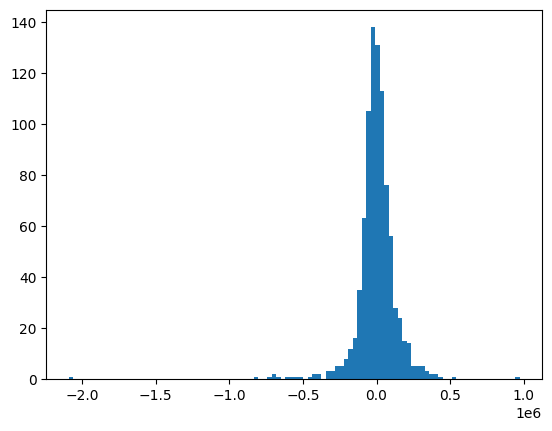

In [31]:
residuos = y_pred - y_test

plt.hist(residuos, bins = 100)
plt.show()

Na regressão linear, a distribuição tem a maioria dos valores próximos ao zero, o que é ótimo!

Como uma bônus, vamos ver como fazemos o mesmo utilizando o algoritmo Random Forest Regressor.

# Random Forest

In [32]:
#Variável para gerar um valor aleatório de random state
rst2 = np.random.randint(0, 1000)

#Instanciando modelo
rf = RandomForestRegressor(n_estimators=25, random_state = rst2)

#Treinando o modelo
rf.fit(X_train_preprocessed, y_train)

#Testando modelo
y_pred2 = rf.predict(X_test_preprocessed)

In [33]:
#Fazendo cross validation
cross_value2 = cross_val_score(rf, X_train_preprocessed, y_train, cv=5) 

In [34]:
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
rmse = sqrt(mean_squared_error(y_test, y_pred2))

print('R2:', round(r2*100, 2), '%')
print('MAE:', mae)
print('RMSE:', rmse)
print('Cross_value_mean:', round(cross_value2.mean()*100, 2), '%')
print('Cross_values:', cross_value2)

R2: 69.46 %
MAE: 89674.48722907466
RMSE: 158458.6110598709
Cross_value_mean: 71.63 %
Cross_values: [0.71040198 0.77296902 0.71453327 0.64409721 0.73969227]


Com random forest, os valores das métricas foram bem similares aos da regressão linear, apenas representando uma eficácia um pouco menor. Como no valor de r2 de 69.46% e no valor médio de 71.63% no cross validation.

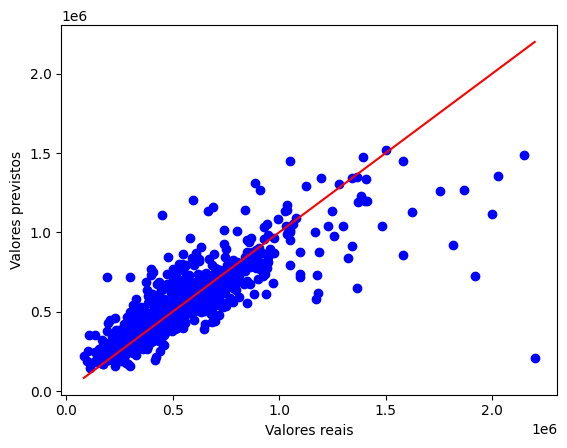

In [35]:
# plotar valores reais vs valores previstos
plt.scatter(y_test, y_pred2, color='blue')

# adicionar linha diagonal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c ='r')

# definir rótulos dos eixos
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')

# mostrar gráfico
plt.show()

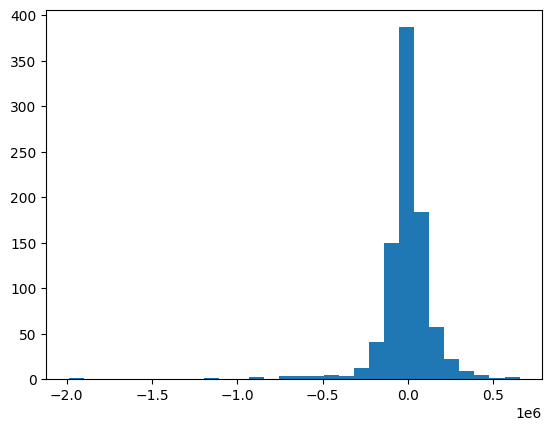

In [36]:
residuos2 = y_pred2 - y_test

plt.hist(residuos2, bins = 30)
plt.show()

Os mesmos padrões de distribuição aconteceram também com Random Forest: erro maior para as casas mais valiosas.

## Conclusões

Foram atingidos bons resultados (**Cerca de 75% de R2 e 85.000 de MAE com Regressão Linear** e **Cerca de 71% de R2 e 89.000 com Random Forest**) mesmo com a variável target (preço) tendo uma alta variabilidade (80,000 a 2,300,000).

Dentre os dados contidos no dataset, os que mais influenciam nos preços dos imóveis são: 'sqft_living' (Área total na parte interna da casa) e 'sqft_above' (Área total nas partes superiores).

O ano de construção ('yr_built') não necessariamente interfere nos preços dos imóveis, já que casas mais novas podem ter características que as levem a ter um preço inferior ao de casas mais antigas.

Obrigado por ler! :)